# **Sobre o notebook**

Realização de **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

O presente estudo inclui a avaliação dos tipos dos dados e suas distribuições, cálculo das medidas de tendência central, medidas separatrizes e de dispersão dos dados e construções visuais como histogramas, boxplot, entre outras para responder às perguntas.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [2]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [5]:
dados['UF']

,UF
0,Rondônia
1,Rondônia
2,Rondônia
3,Rondônia
4,Rondônia
...,...
76835,Distrito Federal
76836,Distrito Federal
76837,Distrito Federal
76838,Distrito Federal


In [6]:
UF_distintos = dados['UF'].unique()
UF_distintos

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [5]:
quantidade_UF = dados['UF'].value_counts().reset_index()
quantidade_UF

,UF,count
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


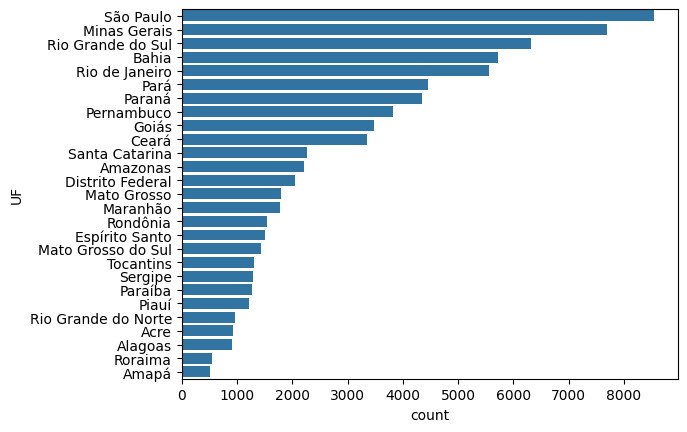

In [8]:
sns.barplot(data=quantidade_UF, x='count', y='UF')
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [28]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

In [10]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


##### Sexo

In [29]:
dados['Sexo.Desc'] = pd.Categorical(
    dados['Sexo'],
    categories=[0,1],
   ordered=True
  )

print(dados['Sexo.Desc'])

0        0
1        1
2        1
3        0
4        1
        ..
76835    1
76836    0
76837    0
76838    0
76839    0
Name: Sexo.Desc, Length: 76840, dtype: category
Categories (2, int64): [0 < 1]


In [33]:
dados['Sexo.Desc']  = dados['Sexo.Desc'].map(sexo)

In [9]:
sexo_distintos = dados[['Sexo', 'Sexo.Desc']].drop_duplicates()
sexo_distintos

,Sexo,Sexo.Desc
0,0,Masculino
1,1,Feminino


##### Cor

In [30]:
dados['Cor.Desc'] = pd.Categorical(
    dados['Cor'],
    categories=[0, 2, 4, 6, 8],
   ordered=True
  )

In [34]:
dados['Cor.Desc'] = dados['Cor.Desc'].map(cor)

dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo.Desc,Cor.Desc,Anos.de.Estudo.Detalhado
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,12
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,12
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,15
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,6
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,9


In [12]:
cor_distintos = dados[['Cor', 'Cor.Desc']].drop_duplicates()
cor_distintos

,Cor,Cor.Desc
0,8,Parda
1,2,Branca
8,4,Preta
35,6,Amarela
659,0,Indígena


##### Anos de Estudo

In [31]:
dados['Anos.de.Estudo.Detalhado'] = pd.Categorical(
    dados['Anos.de.Estudo'],
    categories=range(1, 18),
   ordered=True
  )

In [35]:
dados['Anos.de.Estudo.Detalhado'] = dados['Anos.de.Estudo.Detalhado'].map(anos_de_estudo)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo.Desc,Cor.Desc,Anos.de.Estudo.Detalhado
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [15]:
ano_distintos = dados[['Anos.de.Estudo', 'Anos.de.Estudo.Detalhado']].drop_duplicates().sort_values(by='Anos.de.Estudo.Detalhado')
ano_distintos

,Anos.de.Estudo,Anos.de.Estudo.Detalhado
20,1,Sem instrução e menos de 1 ano
43,2,1 ano
37,3,2 anos
49,4,3 anos
22,5,4 anos
3,6,5 anos
36,7,6 anos
50,8,7 anos
4,9,8 anos
16,10,9 anos


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [22]:
print(f"A menor renda dentre os dados levantados é de R${min(dados['Renda']):,.2f} e a maior é de R$ {max(dados['Renda']):,.0f}")

A menor renda dentre os dados levantados é de R$0.00 e a maior é de R$ 200,000


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [22]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo.Desc,Cor.Descricao,Anos.de.Estudo.Detalhado
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,12
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,12
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,15
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,6
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,9


In [23]:
freq_domicilio = (dados.groupby('Sexo.Desc', observed=False)
                   .size()
                   .reset_index(name='Freq.absoluta')
                   .sort_values(by='Sexo.Desc', ascending=False))

freq_domicilio

,Sexo.Desc,Freq.absoluta
1,Feminino,23590
0,Masculino,53250


In [24]:
freq_domicilio['Freq.relativa'] = round((freq_domicilio['Freq.absoluta'] / freq_domicilio['Freq.absoluta'].sum()) * 100, 1)
freq_domicilio

,Sexo.Desc,Freq.absoluta,Freq.relativa
1,Feminino,23590,30.7
0,Masculino,53250,69.3


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [25]:
freq_domicilio.columns = ['Sexo', 'Quantidade', 'Porcentagem (%)']
freq_domicilio

,Sexo,Quantidade,Porcentagem (%)
1,Feminino,23590,30.7
0,Masculino,53250,69.3


In [28]:
dist_freq = pd.crosstab(dados['Sexo.Desc'], dados['Cor.Descricao'])
dist_freq

Cor.Descricao,Indígena,Branca,Preta,Amarela,Parda
Sexo.Desc,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [30]:
freq_relativa = round(pd.crosstab(dados['Sexo.Desc'], dados['Cor.Descricao'], normalize = 'all') * 100,2)
freq_relativa

Cor.Descricao,Indígena,Branca,Preta,Amarela,Parda
Sexo.Desc,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> #### Conclusões

Em todos os grupos há predominância masculina como responsável pelo domicílio, com a disparidade de participação entre os gêneros aumentando conforme aumenta a quantidade de pessoas, refletindo um desequilíbrio de papel como responsável pelo domicílio entre os gêneros.
Homens pardos e mulheres pardas são os maiores grupos em seus respectivos gêneros.


#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [31]:
ticket_medio = round(pd.crosstab(dados['Sexo.Desc'], dados['Cor.Descricao'], values=dados['Renda'], aggfunc='mean'), 2)

ticket_medio

Cor.Descricao,Indígena,Branca,Preta,Amarela,Parda
Sexo.Desc,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões


Observa-se grande disparidade de ticket médio entre os grupos, principalmente de pessoas pardas e pretas, com ticket médio não ultrapassando R$ 2.000,00 em nenhum dos gêneros.
Homens indígenas tem o menor ticket médio de todos, sendo esse o único grupo no qual o ticket médio feminino é maior do que o masculino.

As pessoas amarelas encontram-se super-reprepresentadas, contando com o maior ticket médio tanto entre homens quanto entre mulheres, apesar de representarem, respectivamente, apenas 0,31% e e 0,15% do total da população.

Pessoas amarelas também contam com a maior diferença entre os gêneros quanto ao valor do ticket médio, sendo a menor diferença entre os gêneros verificada entre as pessoas pretas, seguidas de perto pelas pessoas pardas, o que pode ser consequencia dos valores baixos do ticket médio de ambos os grupos.

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [81]:
media_renda = round(float(dados.Renda.mean()), 2)
media_renda

2000.38

In [82]:
mediana_renda = dados.Renda.median()
mediana_renda

1200.0

In [88]:
moda_renda = dados.Renda.mode()
moda_renda

,Renda
0,788


In [89]:
frequencia = dados[dados['Renda'].isin(moda_renda.values)]
frequencia.Renda.value_counts()

,count
Renda,
788,6881


#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [116]:
dados.groupby('UF')['Renda'].sum().sort_values(ascending=False)


,Renda
UF,
São Paulo,22539969
Minas Gerais,15805737
Rio Grande do Sul,14636431
Rio de Janeiro,13870016
Paraná,10863301
Distrito Federal,8712975
Bahia,8173281
Goiás,6937152
Pará,6224493


In [95]:
top5_renda = dados.groupby('UF').agg(media=('Renda', 'mean')).reset_index()
top5_renda = round(top5_renda.sort_values(by='media', ascending=False).head(5),2)
top5_renda

,UF,media
6,Distrito Federal,4241.95
25,São Paulo,2638.10
20,Rio de Janeiro,2496.40
13,Paraná,2493.87
23,Santa Catarina,2470.85


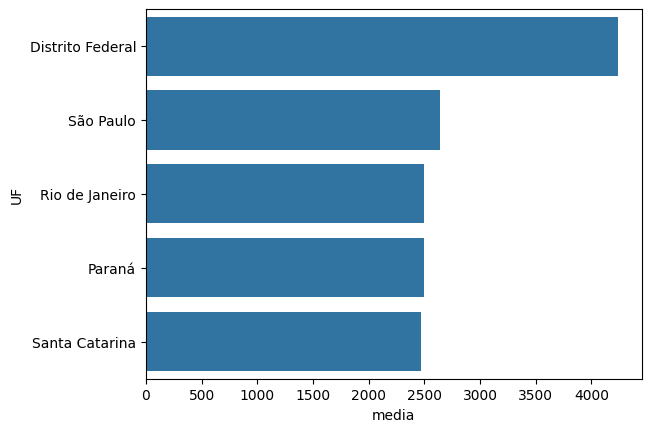

In [93]:
sns.barplot(data=top5_renda, x='media', y='UF')
plt.show()

> #### Conclusões

O Distrito Federal dispara como a maior renda média entre as Unidades da Federação, com uma renda média cerca de 61% superior à de São Paulo, que aparece em 2o lugar, mesmo este sendo o Estado com a maior renda total.

Para os demais Estados que compõem o grupo das maiores rendas do Brasil, observam-se rendas médias próximas entre si, todos com renda média ligeiramente menor do que a de São Paulo.

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [16]:
dados_sudeste = dados[dados['UF'].isin(['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'])]

dados_sudeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo.Desc,Cor.Desc,Anos.de.Estudo.Detalhado
31818,Minas Gerais,0,40,2,12,1600,1.62,Masculino,Branca,11 anos
31819,Minas Gerais,0,58,8,5,850,1.58,Masculino,Parda,4 anos
31820,Minas Gerais,0,36,8,3,1400,1.75,Masculino,Parda,2 anos
31821,Minas Gerais,0,21,8,11,1500,1.66,Masculino,Parda,10 anos
31822,Minas Gerais,0,28,2,9,1600,1.62,Masculino,Branca,8 anos
...,...,...,...,...,...,...,...,...,...,...
55110,São Paulo,0,52,8,12,1500,1.82,Masculino,Parda,11 anos
55111,São Paulo,0,30,8,12,1500,1.48,Masculino,Parda,11 anos
55112,São Paulo,0,43,8,5,1100,1.72,Masculino,Parda,4 anos
55113,São Paulo,1,51,8,16,1600,1.75,Feminino,Parda,15 anos ou mais


##### **Média**

In [17]:
renda_media = round(pd.crosstab(dados_sudeste['Sexo.Desc'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='mean'), 2)

renda_media

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
Sexo.Desc,,,,
Masculino,2129.32,2283.16,2777.55,2947.74
Feminino,1752.71,1489.62,1971.53,1950.18


##### **Mediana**

In [18]:
renda_mediana = round(pd.crosstab(dados_sudeste['Sexo.Desc'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='median'), 2)

renda_mediana

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
Sexo.Desc,,,,
Masculino,1500.0,1400.0,1510.0,1820.0
Feminino,927.0,900.0,1040.5,1200.0


##### **Renda Máxima**

In [19]:
renda_maxima = round(pd.crosstab(dados_sudeste['Sexo.Desc'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='max'), 2)

renda_maxima

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
Sexo.Desc,,,,
Masculino,40000,100000,200000,80000
Feminino,100000,30000,120000,50000


> #### Conclusões

São Paulo aparece como o Estado com as maiores rendas média e mediana para os grupos masculino e feminino. Somado ao fato de que a renda máxima para este Estado é menor do que a renda máxima de dois outros Estados em ambos os grupos, conclui-se que a maior parte da população de São Paulo tende a ter uma renda maior quando comparado com seus pares do Sudeste.

Rio de Janeiro apresenta a maior renda máxima para os homens e o Espírito Santo para as mulheres. Este segundo caso é particularmente chamativo, dado que a renda mediana das mulheres do Espírito Santo só é maior, e por pouco, que a renda mediana das mulheres de Minas Gerais.

Cabe observar que a disparidade entre as rendas média e mediana do grupo feminino do Espírito Santo já apontava para a existência de outliers. Em mesmo sentido, a diferença entre a renda média e mediana do Rio de Janeiro para os dois grupos também apontava para uma renda máxima capaz de distorcer a renda real da maioria da população deste Estado. Estas distorçoes de fato foram confirmadas com o levantamento da renda máxima.

No outro espectro, verifica-se que a menor diferença entre renda média e renda mediana ocorre no Espírito Santo para os homens e em Minas Gerais para as mulheres, denotando menor desigualdade de renda.

A situação diametralmente oposta das populações masculina e feminina no Espírito Santo demandam maiores estudos a fim de buscar entender por quais razões essa diferença de gênero é tão grande neste Estado.



#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

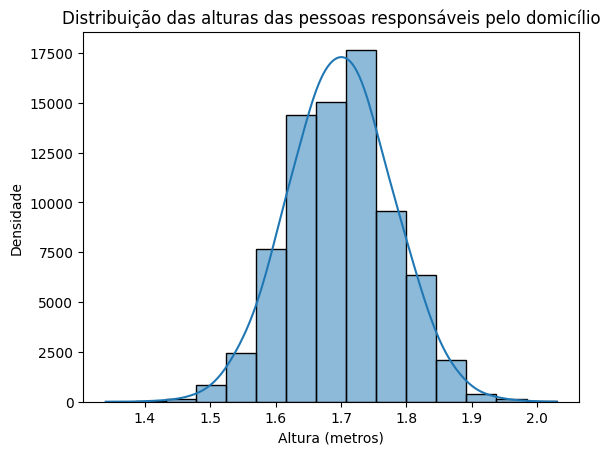

In [20]:
sns.histplot(bins=15, data=dados, x='Altura', kde=True, kde_kws={'bw_adjust':2})

plt.title('Distribuição das alturas das pessoas responsáveis pelo domicílio')
plt.xlabel('Altura (metros)')
plt.ylabel('Densidade')

plt.show()

In [127]:
altura_resumo = {
    'media': round(float(dados['Altura'].mean()),2),
    'mediana': dados['Altura'].median(),
    'moda': float(dados['Altura'].mode()[0])
}

altura_resumo

{'media': 1.7, 'mediana': 1.7, 'moda': 1.7}

> #### Conclusões

A curva de densidade do histograma passa bem próximo ao ponto médio do gráfico, o que demonstra a tendência geral de simetria dos valores. O levantamento das medidas de tendência central confirmam essa simetria, sendo os valores médio, mediano e moda exatamente os mesmos.

##### **Idade**

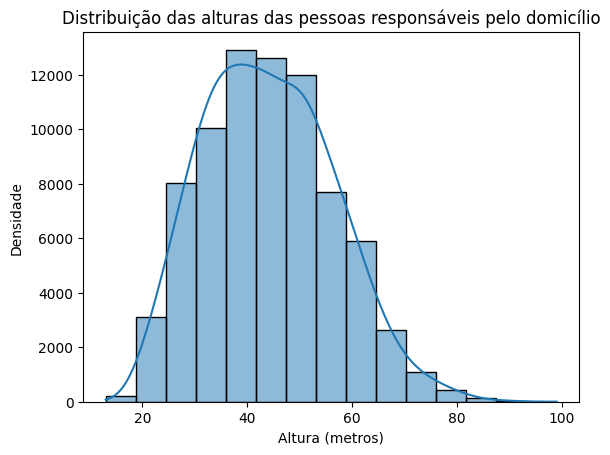

In [129]:
sns.histplot(bins=15, data=dados, x='Idade', kde=True, kde_kws={'bw_adjust':2})

plt.title('Distribuição das alturas das pessoas responsáveis pelo domicílio')
plt.xlabel('Altura (metros)')
plt.ylabel('Densidade')

plt.show()

In [21]:
idade_resumo = {
    'media': float(round(dados['Idade'].mean(),2)),
    'mediana': dados['Idade'].median(),
    'moda': int(dados['Idade'].mode()[0])
}

idade_resumo

{'media': 44.07, 'mediana': 43.0, 'moda': 40}

> #### Conclusões

A curva de tendência mais achatada no histograma demonstra uma pequena tendência à assimetria dos valores. Conforme levantado, a MTC aponta para uma moda inferior à média e mediana das idades, o que ocorre ante a existência de domicílios que tem como responsável pessoas com 65 anos ou mais.

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [22]:
renda_15 = dados[dados['Renda'] <= 15000]
renda_15.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo.Desc,Cor.Desc,Anos.de.Estudo.Detalhado
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [23]:
n = len(renda_15)
n

76219

In [24]:
import math

In [25]:
k = 1 + (10/3) * math.log10(n)
k = int(k)
k

17

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [26]:
faixas = renda_15.copy()

faixas['faixa_renda'] = pd.cut(faixas['Renda'], bins=k, include_lowest=True)

faixas.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo.Desc,Cor.Desc,Anos.de.Estudo.Detalhado,faixa_renda
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,"(-15.001, 882.353]"


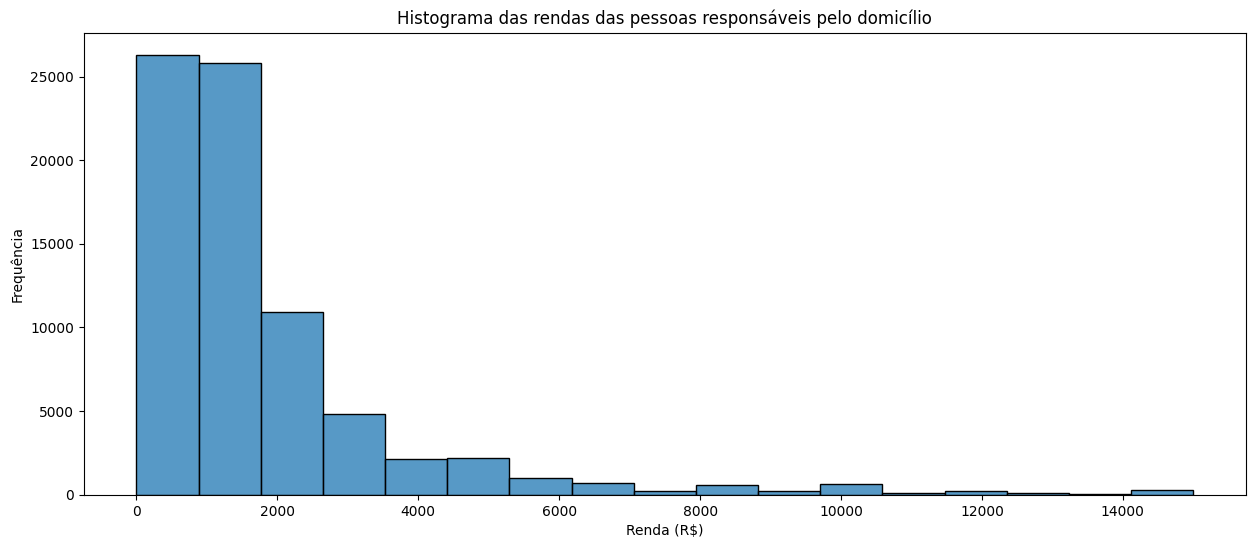

In [12]:
plt.figure(figsize=(15, 6))
sns.histplot(bins=k, data=renda_15, x='Renda')
plt.title('Histograma das rendas das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.show()

> #### Conclusões

Segundo as informações obtidas, em 2015 28,87% dos domicílios levantados detinham renda igual ou inferior a um salário mínimo, o qual na época era de R$ 788,00.

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [29]:
percentual = (dados['Renda'] <= 788).sum() / len(dados) * 100
percentual = round(float(percentual), 2)
percentual

28.87

##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [18]:
limite = dados['Renda'].quantile(0.95)
maior_valor_95 = dados[dados['Renda'] <= limite]['Renda'].max()
maior_valor_95

6000

##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [19]:
limite_min = dados['Renda'].quantile(0.99)
menor_valor_1 = dados[dados['Renda'] >= limite_min]['Renda'].min()
menor_valor_1

15000

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [4]:
renda_6 = dados[dados['Renda'] <= 6000]
renda_6

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69
...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69
76836,Distrito Federal,0,30,4,7,1500,1.79
76837,Distrito Federal,0,32,8,12,1300,1.83
76838,Distrito Federal,0,57,8,4,1500,1.73


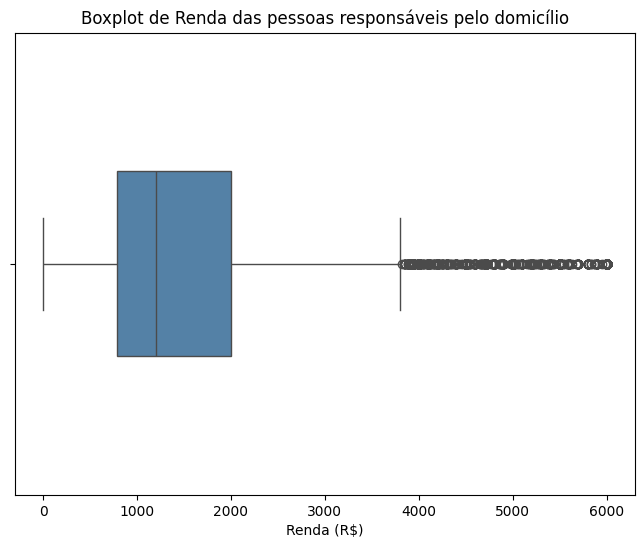

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=renda_6['Renda'], color='steelblue')

plt.title('Boxplot de Renda das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')

plt.ylim(-1, 1)

plt.show()

In [5]:
resumo_renda_6 = {
    'Q1': float(renda_6['Renda'].quantile(0.25)),
    'Q2': float(renda_6['Renda'].quantile(0.50)),
    'Q3': float(renda_6['Renda'].quantile(0.75))
}

resumo_renda_6

{'Q1': 788.0, 'Q2': 1200.0, 'Q3': 2000.0}

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

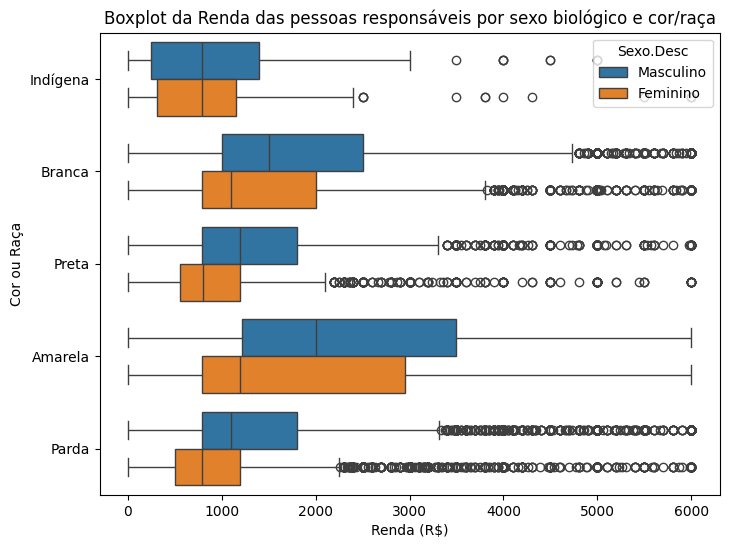

In [33]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='Cor.Desc', data=renda_6, hue='Sexo.Desc')

plt.title('Boxplot da Renda das pessoas responsáveis por sexo biológico e cor/raça')
plt.xlabel('Renda (R$)')
plt.ylabel('Cor ou Raça')

plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

In [6]:
idade_limite = float(dados['Idade'].quantile(0.2))
idade_limite

33.0

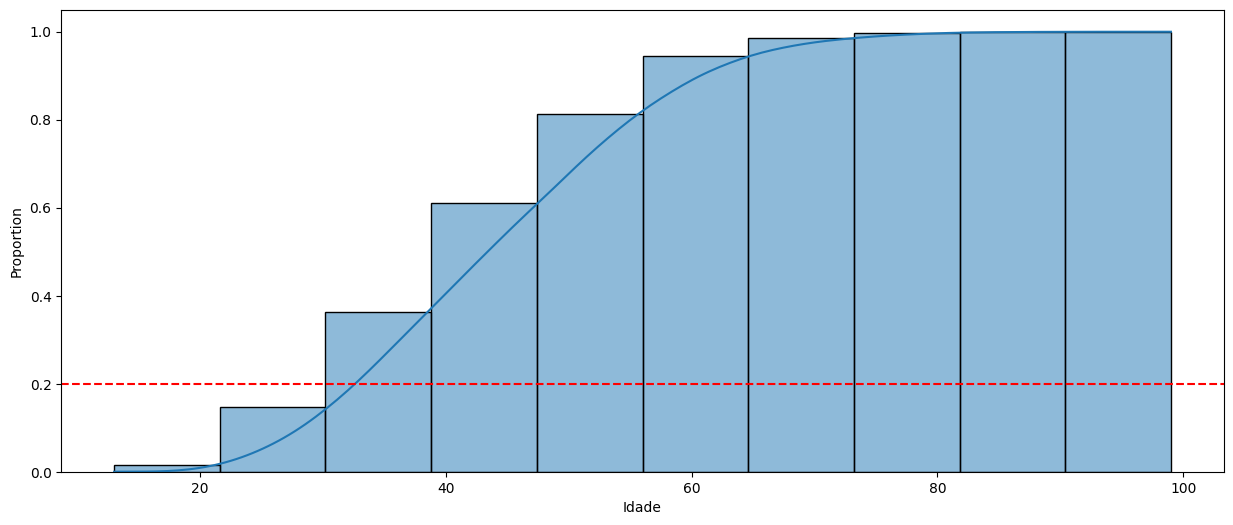

In [8]:
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', bins= 10, cumulative=True, stat='proportion', kde=True )
plt.axhline(0.20, color='red', linestyle='dashed')

plt.show()

In [9]:
idades_classificacao = dados.copy()

In [10]:
idades_classificacao = idades_classificacao.sort_values(by='Idade')

idades_classificacao['cumulativo'] = (idades_classificacao.reset_index().index + 1) / len(idades_classificacao)

idades_classificacao['qualificado'] = idades_classificacao['cumulativo'] <= 0.20

idades_classificacao.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,0.000065,True


In [17]:
idades_classificacao.tail()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,cumulativo,qualificado
10899,Tocantins,0,92,8,1,0,1.68,0.999948,False
36162,Minas Gerais,0,94,2,4,0,1.80,0.999961,False
1789,Acre,0,95,8,9,500,1.86,0.999974,False
11834,Maranhão,0,97,0,1,0,1.76,0.999987,False
74079,Goiás,0,99,4,1,0,1.65,1.000000,False


In [15]:
idades_qualificados = idades_classificacao[idades_classificacao['qualificado'] == True]
idades_qualificados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,0.000065,True


In [16]:
idades_qualificados.tail()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,cumulativo,qualificado
37555,Minas Gerais,0,33,8,12,788,1.60,0.199948,True
18203,Rio Grande do Norte,1,33,4,9,600,1.66,0.199961,True
18199,Rio Grande do Norte,1,33,8,7,200,1.54,0.199974,True
22744,Pernambuco,0,33,4,6,805,1.63,0.199987,True
12991,Maranhão,1,33,8,12,870,1.66,0.200000,True


In [14]:
len(idades_qualificados)

15368

> #### Conclusões

O histograma demonstra que a faixa de população dos 20% mais jovens se situa dentro da faixa de 30 a 40 anos, confirmando visualmente a informação anterior de que o limite para essa faixa é a idade de 33 anos.
Dentro dessa faixa, encontram-se 15.368 domicílios dentre o total avaliado.

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [27]:
estat_pessoas = dados['Renda'].agg(
    media='mean',
    mediana='median',
    mad=lambda x: (abs(x - x.mean())).mean()
).reset_index()

estat_pessoas = round(estat_pessoas, 2)
estat_pessoas

,index,Renda
0,media,2000.38
1,mediana,1200.00
2,mad,1526.50


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [39]:
estat_renda_anos_estudo = dados.groupby('Anos.de.Estudo.Detalhado', observed=False)['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()

estat_renda_anos_estudo = round(estat_renda_anos_estudo, 2)
estat_renda_anos_estudo

,Anos.de.Estudo.Detalhado,media,mediana,desvio_padrao
0,Sem instrução e menos de 1 ano,732.99,600.0,955.27
1,1 ano,806.52,700.0,1203.87
2,2 anos,842.56,788.0,1298.87
3,3 anos,980.04,788.0,1907.14
4,4 anos,1150.44,900.0,1293.14
5,5 anos,1183.58,940.0,1328.71
6,6 anos,1284.08,1000.0,1326.14
7,7 anos,1289.17,1000.0,1279.41
8,8 anos,1437.74,1100.0,1404.28
9,9 anos,1315.69,1000.0,1888.37


> #### Conclusões

É possível observar que há uma tendência de aumento do desvio padrão conforme há aumento dos anos de estudo, o que indica uma maior variabilidade da renda entre pessoas com mais anos de estudo. Esses valores apontam uma tendência de manutenção de renda baixa e semelhante entre as famílias com menos anos de estudo.

O aumento no desvio padrão é acompanhado também pelo aumento da diferença entre a média e a mediana conforme são acrescidos anos de estudo, o que é um indício de maiores chances de haver outliers para a direita em faixas de domícilios onde os responsáveis tem maior tempo de estudo.

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [41]:
estat_renda_sexo = dados[dados['Renda'] <= 15000].groupby('Sexo.Desc', observed=False)['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()
estat_renda_sexo

,Sexo.Desc,media,mediana,desvio_padrao
0,Masculino,1964.351997,1300.0,2101.163468
1,Feminino,1460.143630,900.0,1763.686374


> #### Conclusões

Para ambos os sexos a mediana é menor do que a média, o que pode indicar outliers à direita. O alto valor de desvio padrão também aponta para uma alta variabilidade da renda, reforçando o ponto anterior. As informações apontam para uma tendência dessa variação ser maior entre os homens.

Há também grande diferença nos valores de renda média, mediana e desvio padrão entre os gêneros, o que é um sinal de desigualdade salarial entre mulheres e homens, com estes tendo em média renda 34,5% maior do que elas.


#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [44]:
renda_10k_centro_oeste = dados[dados['UF'].isin(['Goiás', 'Distrito Federal', 'Mato Grosso', 'Mato Grosso do Sul']) & (dados['Renda'] <=10e3)]
renda_10k_centro_oeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo.Desc,Cor.Desc,Anos.de.Estudo.Detalhado
68068,Mato Grosso do Sul,0,53,2,12,1250,1.79,Masculino,Branca,11 anos
68069,Mato Grosso do Sul,0,19,2,9,764,1.75,Masculino,Branca,8 anos
68070,Mato Grosso do Sul,1,36,8,8,650,1.74,Feminino,Parda,7 anos
68071,Mato Grosso do Sul,0,31,2,9,5500,1.77,Masculino,Branca,8 anos
68072,Mato Grosso do Sul,1,51,8,6,400,1.82,Feminino,Parda,5 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


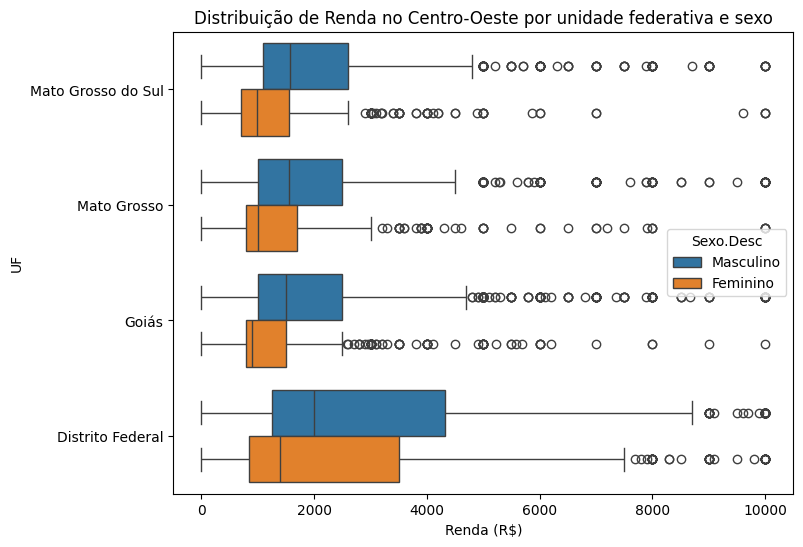

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='UF', data=renda_10k_centro_oeste, hue='Sexo.Desc')

plt.title('Distribuição de Renda no Centro-Oeste por unidade federativa e sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('UF')

plt.show()

##### **Média**

In [46]:
renda_10k_centro_oeste_media = round(pd.crosstab(renda_10k_centro_oeste['Sexo.Desc'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='mean'), 2)

renda_10k_centro_oeste_media

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
Sexo.Desc,,,,
Masculino,3138.46,2030.06,2092.10,2181.73
Feminino,2551.87,1284.65,1548.93,1396.69


##### **Mediana**

In [48]:
renda_10k_centro_oeste_mediana = round(pd.crosstab(renda_10k_centro_oeste['Sexo.Desc'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='median'), 2)

renda_10k_centro_oeste_mediana

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
Sexo.Desc,,,,
Masculino,2000.0,1500.0,1560.0,1576.0
Feminino,1400.0,900.0,1000.0,986.0


##### **Desvio Padrão**

In [49]:
renda_10k_centro_oeste_sd = round(pd.crosstab(renda_10k_centro_oeste['Sexo.Desc'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='std'), 2)

renda_10k_centro_oeste_sd

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
Sexo.Desc,,,,
Masculino,2513.43,1587.38,1707.91,1773.44
Feminino,2451.17,1110.00,1508.59,1400.90


> #### Conclusões

Em todos os Estados do Centro-Oeste há diferença entre as rendas média e mediana e alto desvio padrão, o que são demonstrativos de grande variação da renda média estadual e indica a possibilidade de haver outliers. O caso do Distrito Federal se destaca, indicando possível grande disparidade de renda tanto para homens quanto para mulheres.

Goiás é o Estado que apresentar menor desvio padrão, indicando menor variação salarial estadual, mas também é o Estado com menor renda média tanto entre as mulheres quanto entre os homens. A manutenção da diferença entre renda média e mediana nesse Estado mantém os indícios da existência de outliers.

Em todos os Estados é possível observar desigualdade salarial entre os gêneros, o que aponta para a manutenção dessa realidade independentemente da renda média estadual ser alta ou baixa.